## <center> Uncovering the Complex Relationship between Total Business Reviews and Ratings: A Polynomial Regression Analysis Using Skewed Normal Distribution </center>

<script src="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/js/all.min.js"></script>



<style>
/* Add custom CSS styling here */
h1 {
  font-family: Arial, sans-serif;
  font-size: 28px;
  color: #333;
}

h2 {
  font-family: Arial, sans-serif;
  font-size: 20px;
  color: #666;
}

ul {
  margin-left: 20px;
}

li:before {
  content: "\2022";
  color: #666;
  margin-right: 10px;
}

</style>


<!-- Add font awesome icons -->
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.min.css" />
<script src="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/js/all.min.js"></script>

<!-- Contents -->
<h1>Contents</h1>

<h2>1. Importing data and libraries</h2>

<h2>2. Exploratory Data Analysis (EDA)</h2>
<ul>
  <li>2.1 Missing and Duplicate Values</li>
  <li>2.2 Behaviour of Star Ratings</li>
  <li>2.3 Behaviour of Business Review Count</li>
  <li>2.4 Correlation Tests</li>
</ul>

<h2>3. Regression Models</h2>
<ul>
  <li>3.1 Linear Regression Model</li>
  <li>3.2 Quadratic Regression Model</li>
  <li>3.3 Cubic Regression Model</li>
  <li>3.4 Weighted Cubic Regression using skewed normal distribution pdf of star ratings as weights</li>
</ul>

<h2>4. Results</h2>
<ul>
  <li>4.1 Model Comparison</li>
  <li>4.2 Visualization of data of businesses, their star ratings and their review counts with our cubic regression models</li>
  <li><i class="fas fa-check"></i> 4.3 Gaussinaity Tests on Cubic Regression Models</li>
</ul>

## 1. Importing data and libraries

In [193]:
import pandas as pd
import json
from typing import List, Tuple
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis, skewnorm, shapiro, norm
import plotly
import plotly.io as pio
import plotly.graph_objects as go
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [65]:
!pip install seaborn --upgrade

In [175]:
# Set the path to your JSON file
json_file_path = 'yelp_academic_dataset_business.json'

# Define the chunk size
chunk_size = 1000

# Open the JSON file in read mode
with open(json_file_path, 'r') as json_file:

    # Loop over the chunks
    for chunk in pd.read_json(json_file, lines=True, chunksize=chunk_size):
        # Process each chunk here
        # For example, you could filter the data or perform some calculations
        # on a subset of the data
        print(chunk.head())
        break

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

## 2. Exploratory Data Analysis (EDA)

In [176]:
chunk = chunk.drop(['hours'], axis=1)
chunk

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,iNMdSi5bmvGSGeRQiUW4dw,Wendy's,3535 E. Irvington Road,Tucson,AZ,85714,32.163740,-110.916722,2.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Fast Food, Burgers, Restaurants"
996,0QmgzzPVNHeNL76B8rwTKA,Beneficial Bank,1600 Chestnut St,Philadelphia,PA,19103,39.951154,-75.167335,2.5,5,0,None,"Banks & Credit Unions, Financial Services"
997,ByDCN9n5mwHP9LQqUx-1pw,Largo Police Department,201 Highland Ave,Largo,FL,33770,27.920194,-82.776363,2.5,7,1,None,"Public Services & Government, Police Departments"
998,TwIouh_gbW9TCSK3PhuPrg,T J Maxx,545 Cool Springs Blvd,Franklin,TN,37067,35.948462,-86.823777,3.0,28,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Fashion, Shopping, Department Stores"


### 2.1 Missing and Duplicate Values

In [177]:
#Dealing with missing values
missing_values = chunk.isna().sum()
print(missing_values)

business_id      0
name             0
address          0
city             0
state            0
postal_code      0
latitude         0
longitude        0
stars            0
review_count     0
is_open          0
attributes      90
categories       0
dtype: int64


In [178]:
business = chunk.dropna() #Removing missing values
business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,OCrqJ_5eS517_2QIYqCmDQ,Contemporary Automotive,205 N Causeway Blvd,Metairie,LA,70001,29.975724,-90.155533,5.0,11,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Auto Repair, Body Shops, Transmission Repair, ..."
994,9yl6MnXqbzIh0NH2wNreFw,Lincoln Tactical,5809 S Dale Mabry Hwy,Tampa,FL,33616,27.883264,-82.506542,2.5,14,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Sporting Goods, Shopping, Guns & Ammo"
995,iNMdSi5bmvGSGeRQiUW4dw,Wendy's,3535 E. Irvington Road,Tucson,AZ,85714,32.163740,-110.916722,2.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Fast Food, Burgers, Restaurants"
998,TwIouh_gbW9TCSK3PhuPrg,T J Maxx,545 Cool Springs Blvd,Franklin,TN,37067,35.948462,-86.823777,3.0,28,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Fashion, Shopping, Department Stores"


In [179]:
#Dropping the dict-type column "attributes" due to infeasibility of the duplicated() method 
chunk2 = chunk.drop(['attributes'], axis=1)

#Dealing with duplicate values
duplicate_values = chunk2.duplicated().sum()
print(duplicate_values)

0


### 2.2 Behaviour of Star Ratings

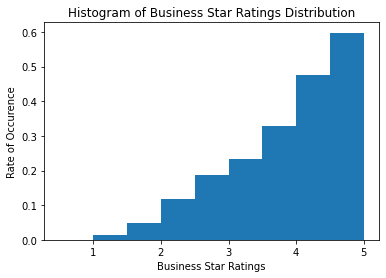

In [180]:
plt.hist(business.stars, bins=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5] , density=True)
plt.title('Histogram of Business Star Ratings Distribution')
plt.xlabel('Business Star Ratings')
plt.ylabel('Rate of Occurence')
plt.show()

In [181]:
from scipy.stats import skew, kurtosis

# Compute skewness and kurtosis
skewness = skew(business["stars"])
kurtosis = kurtosis(business["stars"])

# Print skewness and kurtosis
print("Skewness: {:.4f}".format(skewness))
print("Kurtosis: {:.4f}".format(kurtosis))

Skewness: -0.5644
Kurtosis: -0.3491


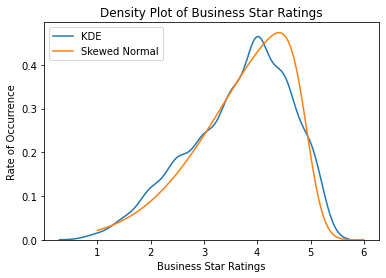

In [182]:
# Fit a skewed normal distribution to the star ratings data
a, loc, scale = skewnorm.fit(business["stars"])

# Plot the density of star ratings and the skewed normal distribution
sns.kdeplot(business["stars"], label="KDE")
t = np.linspace(1, 6, 100)
plt.plot(t, skewnorm.pdf(t, a, loc=loc, scale=scale), label="Skewed Normal")
plt.title('Density Plot of Business Star Ratings')
plt.xlabel('Business Star Ratings')
plt.ylabel('Rate of Occurrence')
plt.legend()
plt.show()

**Why do we think of using weighted regression model in the first?** 

Incorporating prior knowledge: By using a skewed normal distribution as weights, we are incorporating prior knowledge about the distribution of the business star ratings into our model. 	1.	Addressing skewness: As we've discussed earlier, the business star ratings exhibit a slightly left-skewed distribution. By using a skewed normal distribution as weights, we can take into account this skewness and potentially improve the fit of the model.

### 2.3 Behaviour of Business Review Count

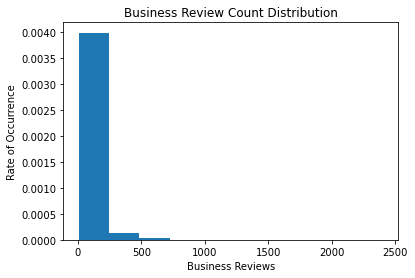

In [183]:
plt.hist(business.review_count, density=True)
plt.title('Business Review Count Distribution')
plt.xlabel('Business Reviews')
plt.ylabel('Rate of Occurrence')
plt.show()

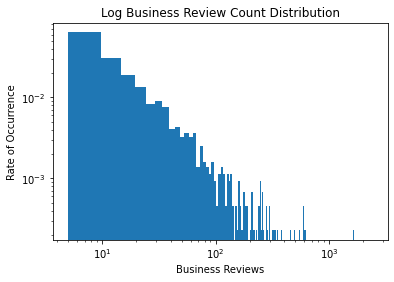

In [184]:
plt.hist(business.review_count, 500, density=True)
plt.title('Log Business Review Count Distribution')
plt.xlabel('Business Reviews')
plt.ylabel('Rate of Occurrence')
plt.xscale('log')
plt.yscale('log')
plt.show()

### 2.4 Correlation Tests

In [174]:
pearson_test = pearsonr(np.log(business['review_count']), business.stars)

print("Correlation Test Between Log Business Reviews and Star Ratings:  ")
print("Pearson Correlation Coefficient:",pearson_test[0],"with p-value:",pearson_test[1])

Correlation Test Between Log Business Reviews and Star Ratings:  
Pearson Correlation Coefficient: 0.0639731588887365 with p-value: 0.006146604055686949


So as per the pearson correlation test we get that our distribution is statistically significant as the p-value is less than 0.05, hence we are assured **that there is a correlation between the log reviews count and star ratings**

## 3. Regression Models

In [185]:
business['log_review_count'] = np.log(business[['review_count']])
business['stars_sq'] = business[['stars']] ** 2
business['stars_cu'] = business[['stars']] ** 3
business

/var/folders/qs/_ffmzjk16gv43f9ntt_xdyrc0000gn/T/ipykernel_42355/1156481565.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qs/_ffmzjk16gv43f9ntt_xdyrc0000gn/T/ipykernel_42355/1156481565.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qs/_ffmzjk16gv43f9ntt_xdyrc0000gn/T/ipykernel_42355/1156481565.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,log_review_count,stars_sq,stars_cu
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",1.945910,25.00,125.000
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...",2.708050,9.00,27.000
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...",3.091042,12.25,42.875
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.382027,16.00,64.000
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food",2.564949,20.25,91.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,OCrqJ_5eS517_2QIYqCmDQ,Contemporary Automotive,205 N Causeway Blvd,Metairie,LA,70001,29.975724,-90.155533,5.0,11,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Auto Repair, Body Shops, Transmission Repair, ...",2.397895,25.00,125.000
994,9yl6MnXqbzIh0NH2wNreFw,Lincoln Tactical,5809 S Dale Mabry Hwy,Tampa,FL,33616,27.883264,-82.506542,2.5,14,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Sporting Goods, Shopping, Guns & Ammo",2.639057,6.25,15.625
995,iNMdSi5bmvGSGeRQiUW4dw,Wendy's,3535 E. Irvington Road,Tucson,AZ,85714,32.163740,-110.916722,2.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Fast Food, Burgers, Restaurants",2.639057,6.25,15.625
998,TwIouh_gbW9TCSK3PhuPrg,T J Maxx,545 Cool Springs Blvd,Franklin,TN,37067,35.948462,-86.823777,3.0,28,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Fashion, Shopping, Department Stores",3.332205,9.00,27.000


### 3.1 Linear Regression Model

In [186]:
reg1 = LinearRegression()
reg1.fit(business[['stars']], business.log_review_count)
reg1

# Create a linear regression model using OLS (ordinary least squares) method
model1 = sm.OLS(business.log_review_count, sm.add_constant(business[['stars']]))

# Fit the model
results1 = model1.fit()

### 3.2 Quadratic Regression Model

In [187]:
reg2 = LinearRegression()
reg2.fit(business[['stars', 'stars_sq']], business.log_review_count)
reg2

# Create a quadratic regression model using OLS (ordinary least squares) method
model2 = sm.OLS(business.log_review_count, sm.add_constant(business[['stars', 'stars_sq']]))

# Fit the model
results2 = model2.fit()

### 3.3 Cubic Regression Model

In [188]:
reg3 = LinearRegression()
reg3.fit(business[['stars', 'stars_sq', 'stars_cu']], business.log_review_count)
reg3

# Create a cubic regression model using OLS (ordinary least squares) method
model3 = sm.OLS(business.log_review_count, sm.add_constant(business[['stars', 'stars_sq','stars_cu']]))

# Fit the model
results3 = model3.fit()

### 3.4 Weighted Cubic Regression using skewed normal distribution pdf of star ratings as weights

In [191]:
# Create the PDF of the skewed normal distribution
pdf2 = skewnorm.pdf(business["stars"], a, loc=loc, scale=scale)

# Create the cubic regression model using the PDFs as weights
X2 = np.column_stack((np.ones(len(business)), business["stars"], business["stars"]**2, business["stars"]**3))
y2 = business["log_review_count"]

#Using WLS (weighted least squares), to build our weighted cubic regression model
model4 = sm.WLS(y2, X2, weights=pdf2)
results4 = model4.fit()

## 4. Results

### 4.1 Model Comparison

In [192]:
# Calculate R^2 for linear regression model
r_squared1 = results1.rsquared

# Calculate R^2 for quadratic regression model
r_squared2 = results2.rsquared

# Calculate R^2 for cubic regression model
r_squared3 = results3.rsquared

# Calculate R^2 for weighted cubic regression model
r_squared4 = results4.rsquared

# Print regression results
print("Polynomial Regression Results Optimised on R-squared")
print("-------------------------------------------------------")
print("")
print(f"R-squared for Linear Regression: {r_squared1:.3f}")
print(f"R-squared for Quadratic Regression: {r_squared2:.3f}")
print(f"R-squared for Cubic Regression: {r_squared3:.3f}")
print(f"R-squared for Weighted Cubic Regression: {r_squared4:.3f}")

Polynomial Regression Results Optimised on R-squared
-------------------------------------------------------

R-squared for Linear Regression: 0.002
R-squared for Quadratic Regression: 0.043
R-squared for Cubic Regression: 0.068
R-squared for Weighted Cubic Regression: 0.043


### 4.2 Visualization of data of businesses, their star ratings and their review counts with our cubic regression models

In [196]:
pio.renderers.default = 'browser'

ag = business.groupby('stars').agg({'review_count': list})

nbins = 20
nstars = len(ag.index)

bins = np.exp(np.linspace(1, 10, num=nbins))

x = np.tile(ag.index, (2*nbins, 1)).T
y = np.tile(
    np.tile(bins, (2, 1)).astype(int).T.ravel(), 
    (nstars, 1)
)

z = np.zeros((nstars, 2*nbins))
for i in range(0, nstars):
    tmp, _ = np.histogram(ag.iloc[i].values[0], bins)
    z[i, 1:-1] = np.tile(tmp, (2,1)).T.ravel()
    
 
fig = go.Figure()

for i in range(0, nstars):
    fig.add_traces(
        go.Scatter3d(
            x = x[i],
            y = y[i],
            z = z[i],
            mode='lines',
            name = '{0} stars'.format(x[i][0])
        )
    )

medians = business.groupby('stars').review_count.median()

fig.add_traces(
    go.Scatter3d(
        x = medians.index,
        y = medians.values,
        z = np.zeros(len(medians)),
        mode = 'lines',
        name = 'Median Values'
        )
)

# Create data for plotting the regression curve
mod1x = np.linspace(1, 5, num=50)
mod1y = results3.params[0] + results3.params[1]*mod1x + results3.params[2]*(mod1x**2) + results3.params[3]*(mod1x**3)
mod1z = np.exp(mod1y)
fig.add_trace(
    go.Scatter3d(
        x = mod1x,
        y = mod1y,
        z = np.zeros(mod1x.shape),
        mode = 'lines',
        name = 'Cubic Regression'
    )
)

# Create data for plotting the regression curve
mod2x = np.linspace(1, 5, num=50)
mod2y = results4.params[0] + results4.params[1]*mod2x + results4.params[2]*(mod2x**2) + results4.params[3]*(mod2x**3)
mod2z = np.exp(mod2y)
fig.add_trace(
    go.Scatter3d(
        x = mod2x,
        y = mod2y,
        z = np.zeros(mod2x.shape),
        mode = 'lines',
        name = 'Cubic Regression (Skewed Normal)'
    )
)

ticks = list(range(2, 10))
fig.update_layout(
    title = 'Business Star Rating vs Business Review Count Distribution',
    title_x = 0.5,
    scene = dict(
        yaxis_type = 'log',
        xaxis_title= 'Star Ratings',
        yaxis_title= 'Log Business Reviews',
        zaxis_title= 'Number of Businesses'
    )
)
plotly.offline.plot(fig, filename='business_regression_final.html')
fig.show()

### 4.3 Gaussinaity Tests on Cubic Regression Models

In [78]:
predicted_values = results3.predict()
residuals = results3.resid

shapiro_statistic, shapiro_p_value = shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {shapiro_statistic}, p-value: {shapiro_p_value}\n')

Shapiro-Wilk test statistic: 0.954474151134491, p-value: 2.1744716851928947e-28



In [79]:
predicted_values2 = results4.predict()
residuals2 = results4.resid

shapiro_statistic, shapiro_p_value = shapiro(residuals2)
print(f'Shapiro-Wilk test statistic: {shapiro_statistic}, p-value: {shapiro_p_value}\n')

Shapiro-Wilk test statistic: 0.9546213150024414, p-value: 2.3846060495650973e-28

